<a href="https://colab.research.google.com/github/Adukemi/MyProjects/blob/main/BAirline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forage British Airways Data Science Task 1**

# **Scrapping data from the web**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# Base URL for British Airways reviews
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
total_pages = 38
reviews_per_page = 100

# Initialize an empty list to store reviews
all_reviews = []

# Iterate through each page
for page in range(1, total_pages + 1):
    print(f"Scraping page {page}...")

    # Construct the URL for the paginated review pages
    url = f"{base_url}/page/{page}/?sortby=post_date%3ADesc&pagesize={reviews_per_page}"

    # Fetch page content
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract review text and store it in the list
    reviews = [review.get_text() for review in soup.find_all("div", class_="text_content")]
    all_reviews.extend(reviews)

    print(f"   ---> Collected {len(all_reviews)} reviews so far.")

Scraping page 1...
   ---> Collected 100 reviews so far.
Scraping page 2...
   ---> Collected 200 reviews so far.
Scraping page 3...
   ---> Collected 300 reviews so far.
Scraping page 4...
   ---> Collected 400 reviews so far.
Scraping page 5...
   ---> Collected 500 reviews so far.
Scraping page 6...
   ---> Collected 600 reviews so far.
Scraping page 7...
   ---> Collected 700 reviews so far.
Scraping page 8...
   ---> Collected 800 reviews so far.
Scraping page 9...
   ---> Collected 900 reviews so far.
Scraping page 10...
   ---> Collected 1000 reviews so far.
Scraping page 11...
   ---> Collected 1100 reviews so far.
Scraping page 12...
   ---> Collected 1200 reviews so far.
Scraping page 13...
   ---> Collected 1300 reviews so far.
Scraping page 14...
   ---> Collected 1400 reviews so far.
Scraping page 15...
   ---> Collected 1500 reviews so far.
Scraping page 16...
   ---> Collected 1600 reviews so far.
Scraping page 17...
   ---> Collected 1700 reviews so far.
Scraping page 1

In [34]:
# Create a DataFrame from the collected reviews
df = pd.DataFrame({"reviews": all_reviews})
# Add a 'Serial Number' column starting from 1
#df.insert(0, "S/N", range(0, len(df)))

df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


In [35]:
# Save the DataFrame to a CSV file without writing the index column
df.to_csv("BAirline_reviews.csv", index=False)

# **Analyse data**

In [36]:
# import libries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('BAirline_reviews.csv')
data

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...
...,...
3795,LHR to VIE BA 704 23 June 2014. The meal servi...
3796,Flew from LHR to Hong Kong April 13th 2014 BA ...
3797,London - BKK Premium economy 19/6/14. I always...
3798,Flight BA 202 Boston to Heathrow. Aircraft B74...


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3800 non-null   object
dtypes: object(1)
memory usage: 29.8+ KB


In [40]:
# Ensure 'reviews' column is a string
data['reviews'] = data['reviews'].astype(str)

# Split the 'reviews' column into two new columns: 'Verification Status' and 'review'
data[['Verification Status', 'review']] = data['reviews'].str.split('|', n=1, expand=True)

# Remove leading and trailing whitespaces
data['Verification Status'] = data['Verification Status'].str.strip()
data['review'] = data['review'].str.strip()

# Fill missing values
data = data.fillna("")

# Display first few rows to verify
print(data.head())

                                             reviews Verification Status  \
0  ✅ Trip Verified |   Flight mainly let down by ...     ✅ Trip Verified   
1  ✅ Trip Verified |   Another awful experience b...     ✅ Trip Verified   
2  ✅ Trip Verified |   The service was rude, full...     ✅ Trip Verified   
3  ✅ Trip Verified |   This flight was a joke. Th...     ✅ Trip Verified   
4  ✅ Trip Verified |   This time British Airways ...     ✅ Trip Verified   

                                              review  
0  Flight mainly let down by a disagreeable fligh...  
1  Another awful experience by British Airways. T...  
2  The service was rude, full of attitude to me, ...  
3  This flight was a joke. There was four people ...  
4  This time British Airways managed to get every...  


In [41]:
data['Verification Status'].value_counts()

,count
Verification Status,
✅ Trip Verified,1317
✅ Verified Review,770
Not Verified,287
❎ Unverified,20
❎ Not Verified,5
...,...
"London Heathrow to Singapore, and the business class of British Airways is below the standard set by its competitors. At Heathrow terminal 5, there is no special check in counter for business class passenger. After performing the self check in, we have to join a common queue to drop our check-in bag. I spent 30 mins in the queue. The business class seat is narrower than other airlines. There is also a lack of storage space for small items such as glasses. It is relatively comfortable to sit and sleep on, but business class travel is about a total experience and British Airways has a lot of catching up to do.",1
"Very busy at LHR due to half term but managed a quick breakfast in the British Airways First lounge before boarding. Flight crew old style and exceptional, food and wine excellent and arrived on time. LAX was hectic but the new entry machines make it much quicker. Got through in under an hour.",1
"British Airways from Antigua to Gatwick. A shabby aircraft, my seat was broken, it would recline without command, the head rest was broken and the seat covers were very worn. The inflight entertainment had to be re set as it wasn't working and when it did work my screen did not display the safety briefing, images would freeze, in effect I did not receive the briefing. The cabin staff refused to dispose of my wife's drink because it was not finished, I had to request another hostess to take it. The food was poor quality in general too, looked like a kids meals, pasta with cheese. Check in was good, queues were long but the staff were very helpful and the flight left on time. British Airways is not in the league of other long haul carriers like Emirates, a lot of work to be done to refresh it's image.",1


# **Dataset for verified trips and reviews**

In [42]:
BA = data[data['Verification Status'].isin(['✅ Trip Verified', ' ✅ Verified Review','✅ Verified Review'])]
BA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2573
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              2087 non-null   object
 1   Verification Status  2087 non-null   object
 2   review               2087 non-null   object
dtypes: object(3)
memory usage: 65.2+ KB


In [43]:
BA = BA.drop('reviews', axis=1)
BA['Verification Status'].value_counts()

,count
Verification Status,
✅ Trip Verified,1317
✅ Verified Review,770


In [47]:
BA = BA.applymap(lambda x: x.replace('✅ ', '') if pd.notna(x) else x)
BA.head()

<ipython-input-47-1965c4fab001>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  BA = BA.applymap(lambda x: x.replace('✅ ', '') if pd.notna(x) else x)


,Verification Status,review
0,Trip Verified,Flight mainly let down by a disagreeable fligh...
1,Trip Verified,Another awful experience by British Airways. T...
2,Trip Verified,"The service was rude, full of attitude to me, ..."
3,Trip Verified,This flight was a joke. There was four people ...
4,Trip Verified,This time British Airways managed to get every...


In [48]:
BA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2573
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  2087 non-null   object
 1   review               2087 non-null   object
dtypes: object(2)
memory usage: 48.9+ KB


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


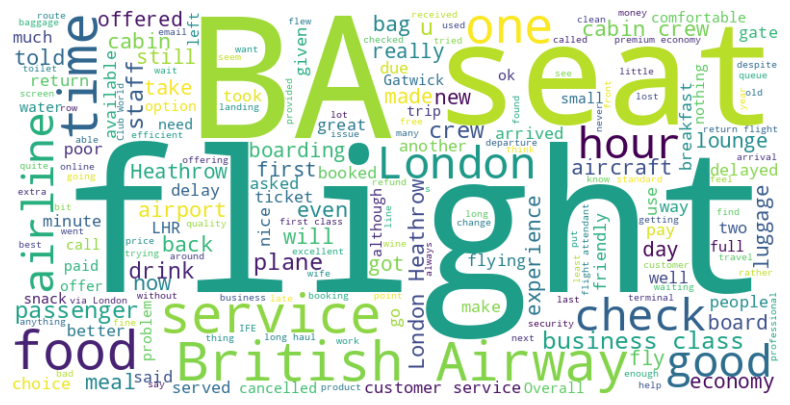

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure you have the required NLTK resources
nltk.download('vader_lexicon')

# Copy the DataFrame (if needed)
df_BA = BA.copy()

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'review' column
df_BA['Sentiment_Score'] = df_BA['review'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Generate a WordCloud from all reviews
all_reviews = ' '.join(df_BA['review'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [59]:
import plotly.express as px

# Calculate the average sentiment score
average_sentiment = df_BA['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment:.2f}')
print("")

# Categorize sentiment based on sentiment score
df_BA['Sentiment_Label'] = df_BA['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative'
)

# Count the number of reviews for each sentiment label
sentiment_label_counts = df_BA['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

# Create a bar chart using Plotly
fig = px.bar(
    sentiment_label_counts,
    x='Sentiment_Label',
    y='Count',
    color='Sentiment_Label',
    labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of Reviews'},
    color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'},
    title='Sentiment Distribution for Verified Trips'
)

# Add text annotations on top of bars
for i, row in sentiment_label_counts.iterrows():
    fig.add_annotation(
        x=row['Sentiment_Label'],
        y=row['Count'] + 5,  # Adjust for better visibility
        text=str(row['Count']),
        showarrow=False,
        font=dict(color='blue', size=15)
    )

# Update layout for better readability
fig.update_layout(
    xaxis_title='Sentiment Label',
    yaxis_title='Number of Reviews',
    template='plotly_white'
)

# Display the plot
fig.show();

Average Sentiment: 0.06



In [61]:
# Count sentiment labels
sentiment_label_counts = df_BA['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

# Create a pie chart using Plotly
fig = px.pie(
    sentiment_label_counts,
    values='Count',
    names='Sentiment_Label',
    title='Sentiment Labels Distribution for Verified Trips',
    color='Sentiment_Label',
    color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'},
    labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of Reviews'},
    hole=0.2  # Donut chart effect
)

# Update layout for better readability
fig.update_layout(
    template='plotly_white',  # Clean theme
    legend_title_text='Sentiment'
)

# Display the plot
fig.show();

In [62]:
df_BA

,Verification Status,review,Sentiment_Score,Sentiment_Label
0,Trip Verified,Flight mainly let down by a disagreeable fligh...,-0.8845,Negative
1,Trip Verified,Another awful experience by British Airways. T...,-0.8294,Negative
2,Trip Verified,"The service was rude, full of attitude to me, ...",-0.4588,Negative
3,Trip Verified,This flight was a joke. There was four people ...,0.0000,Neutral
4,Trip Verified,This time British Airways managed to get every...,0.9831,Positive
...,...,...,...,...
2568,Verified Review,Istanbul to London Heathrow with British Airwa...,0.9413,Positive
2569,Verified Review,"London Heathrow to Houston on British Airways,...",0.9472,Positive
2570,Verified Review,We have flown with British Airways over 100 ti...,-0.1796,Negative
2571,Verified Review,British Airways from Seattle to Johannesburg v...,0.9436,Positive


In [63]:
df_BA.to_csv('Verfied Trips sentiment score and label.csv')

# **Dataset for unverified trips and reviews**

In [64]:
unverified_filtered_data = data[data['Verification Status'].isin(['Not Verified','❎ Not Verified', '❎ Unverified'])]
unverified_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 13 to 2084
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              312 non-null    object
 1   Verification Status  312 non-null    object
 2   review               312 non-null    object
dtypes: object(3)
memory usage: 9.8+ KB


In [65]:
unverified_filtered_data = unverified_filtered_data.drop('reviews', axis=1)
unverified_filtered_data['Verification Status'].value_counts()

,count
Verification Status,
Not Verified,287
❎ Unverified,20
❎ Not Verified,5


In [66]:
unverified_filtered_data = unverified_filtered_data.applymap(lambda x: x.replace('❎ ', '') if pd.notna(x) else x)
unverified_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 13 to 2084
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  312 non-null    object
 1   review               312 non-null    object
dtypes: object(2)
memory usage: 7.3+ KB


<ipython-input-66-5c22495725a6>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



# **Using Wordclouds for sentiment analysis for unverified trips and reviews**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


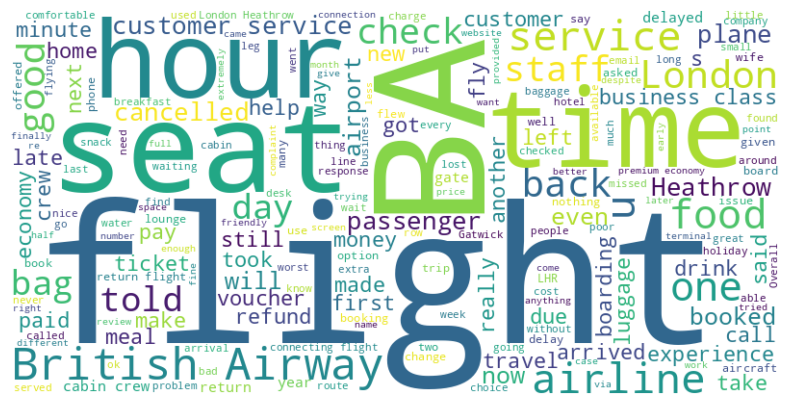

In [67]:
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure NLTK VADER is available
nltk.download('vader_lexicon')

# Copy DataFrame (to avoid modifying the original one)
unverified_filtered_df = unverified_filtered_data.copy()

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the 'review' column
unverified_filtered_df['Sentiment_Score'] = unverified_filtered_df['review'].astype(str).apply(
    lambda x: sia.polarity_scores(x)['compound']
)

# Generate a WordCloud from unverified reviews
all_reviews = ' '.join(unverified_filtered_df['review'].dropna().astype(str))  # Drop NaN values
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show();

In [72]:
# Calculate the average sentiment score
average_sentiment = unverified_filtered_df['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment:.2f}')
print("")

# Categorize sentiment based on sentiment score
unverified_filtered_df['Sentiment_Label'] = unverified_filtered_df['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative'
)

# Count the number of reviews for each sentiment label
sentiment_label_counts = unverified_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

# Create a bar chart using Plotly
fig = px.bar(
    sentiment_label_counts,
    x='Sentiment_Label',
    y='Count',
    color='Sentiment_Label',
    labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of Reviews'},
    color_discrete_map={'Positive': 'blue', 'Neutral': 'yellow', 'Negative': 'red'},
    title='Sentiment Labels Distribution for Unverified Trips'
)

# Add text annotations on top of bars
for i, row in sentiment_label_counts.iterrows():
    fig.add_annotation(
        x=row['Sentiment_Label'],
        y=row['Count'] + 5,  # Adjusted for better visibility
        text=str(row['Count']),
        showarrow=False,
        font=dict(color='black', size=12)
    )

# Update layout for better readability
fig.update_layout(
    xaxis_title='Sentiment Label',
    yaxis_title='Number of Reviews',
    template='plotly_white'  # Clean theme
)

# Display the plot
fig.show();

Average Sentiment: 0.01



In [74]:
# Count the sentiment labels
sentiment_label_counts = unverified_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

# Create a Pie Chart using Plotly
fig = px.pie(
    sentiment_label_counts,
    values='Count',
    names='Sentiment_Label',
    title='Sentiment Labels Distribution for Unverified Trips',
    color='Sentiment_Label',
    color_discrete_map={'Positive': 'blue', 'Neutral': 'yellow', 'Negative': 'red'},
    labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of Reviews'},
    hole=0.2  # Creates a donut-style pie chart
)

# Update layout for better appearance
fig.update_layout(
    template='plotly_white',  # Clean theme
    legend_title_text='Sentiment',
    font=dict(size=12)
)

# Display the chart
fig.show();

In [75]:
unverified_filtered_df.to_csv('Unverfied Trips sentiment score and label.csv')

# **Dataset for reviews that are niether 'verified trips and reviews' nor 'unverified trips and reviews'**

In [76]:
# Define list of values to exclude
exclude_values = [
    'Not Verified', '❎ Not Verified', '❎ Unverified',
    '✅ Trip Verified', '✅ Verified Review', ' ✅ Verified Review'
]

# Filter the DataFrame: Keep only rows where 'Verification Status' is NOT in exclude_values
sorted_filtered_data = data.loc[~data['Verification Status'].isin(exclude_values)].copy()

# Sort values based on 'Verification Status'
sorted_filtered_data = sorted_filtered_data.sort_values(by='Verification Status')

# Display DataFrame info
sorted_filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 3723 to 208
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              1401 non-null   object
 1   Verification Status  1401 non-null   object
 2   review               1401 non-null   object
dtypes: object(3)
memory usage: 43.8+ KB


In [77]:
sorted_filtered_data = sorted_filtered_data.drop('reviews', axis=1)
sorted_filtered_data['Verification Status'].value_counts()

,count
Verification Status,
Our flight on economy long distance from the Austin to Heathrow was the most uncomfortable we've had on any carrier and we have travelled extensively. The seats were so close together with hardly any leg room or arm movement that not only was it difficult to eat the food which was dreadful but very difficult to get in and out of without damaging or twisting a knee or back. We had extreme exhaustion on landing from discomfort and lack of sleep. The evening meal we were served was inedible. The pasta had been hanging around for some time by the appearance. It was dry and congealing in what was once tomato sauce. The foil container was bent and the foil cover crumpled which proves it had been handled and heated up frequently. As for the breakfast in a box it was so bad I cannot comment. We've had better food and seating on low budget airlines and as well as on Myanmar Airlines! We want to support our national airline but definitely not on BA economy. It seems all the attention and care is given to first and business class. A huge disappointment.,2
"London Heathrow to Miami on one of British Airways crummy Boeing 747s. Originally Booked WT Plus choosing flight in an A380 with shiny new updated cabin and entertainment system for 3rd year in a row, and for the 3rd year in a row they promptly changed the plane on my flight for a very elderly and not updated Boeing 747. Do BA actually have any A380's? Reasonably comfortable, but the old on demand entertainment system had a poor choice of films and programs. Cabin staff and food okay from memory but, as usual with British Airways nowadays, very small portions. Took off slightly late in fog, made up time on flight and landed slightly early at Miami. Old aircraft notwithstanding I still think WT Plus is well worth the extra - 7 inches of extra legroom is so much more comfortable than coach.",2
Recently flew with British Airways on Europe trip. One of our flights was delayed due to fog in London so we missed our connecting flight to Paris. Had to stand in a queue for over three hours waiting to be reallocated another flight. Only 3 staff serving 200 people. Not even water was offered to people waiting in this long queue. Awful customer service would not recommend to anyone.,2
"LHR to HKG in Club - 777-300ER. Lovely newish plane and very attentive staff with smiles. Seat was rear facing and perfectly fine as a bed but seems to have got a little narrower. Window seat 13A and was expecting some sort of decent storage space but only a tiny little sliding drawer meaning I had to put everything above in the locker and bother the person in 13B. Food and drink was very good as was inflight entertainment. Decent sleep in a comfortable cabin - only real niggle was the 8 abreast cabin which seems inferior to Cathay / Virgin ""herringbone"" design.",2
"British Airways from Tampa to Gatwick on Boeing 777 Club World. Having travelled out WT Plus to Miami we got a good deal coming back from Tampa so flew Club Class. Checked in at Tampa with no queues, and used the International Lounge at Tampa. Supposed to be exclusive to BA customers this had comfortable seats, and good choice of newspapers and magazines. Did not try WiFi. However, there was disappointingly very poor choice of snacks - a few dried up sorry looking sandwiches which were not replenished during my time there, and crackers with some processed cheese with a few dips, some wine, beer, liquor and soft drinks. Pretty uninspiring stuff. On board comfortable, if narrow, seats that extended into (more or less) flat beds. British Airways still have the very camped 2-4-2 layout with fellow passengers having to clamber over people to go to the rest room etc. Reasonable meal (beef) accompanied by an outstanding Chablis Premier Cru and a very nice Sauvignon Blanc. My wife slept for 5 straight hours - I could only sleep fitfully as not much room at shoulder level but at least the seats were comfortable. Terrible selection of

In [78]:
sorted_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 3723 to 208
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  1401 non-null   object
 1   review               1401 non-null   object
dtypes: object(2)
memory usage: 32.8+ KB


In [80]:
# Find non-null 'review' rows
non_null_rows = sorted_filtered_data[sorted_filtered_data['review'].notna()].copy()

# Print row indices with non-null 'review' values
print("Row numbers with non-null values:")
print(non_null_rows.index.to_list())

# Define the specific row number to modify
row_number = 3321  # Make sure this index exists in the DataFrame

# Ensure the row exists before modifying it
if row_number in sorted_filtered_data.index:
    # Retrieve the value from 'review' column
    value_to_add = sorted_filtered_data.at[row_number, 'review']

    # Append the value to 'Verification Status'
    sorted_filtered_data.at[row_number, 'Verification Status'] += f" {value_to_add}"

    # Drop the 'review' column
    sorted_filtered_data.drop(columns=['review'], inplace=True)

    # Rename 'Verification Status' to 'review'
    sorted_filtered_data.rename(columns={'Verification Status': 'review'}, inplace=True)

    print(f"Updated row {row_number} successfully.")
else:
    print(f"Row {row_number} does not exist in the DataFrame.")


Row numbers with non-null values:
[3723, 3261, 3145, 3757, 3734, 3754, 3248, 3255, 2639, 3708, 3207, 3633, 3294, 3730, 3146, 3143, 2954, 3535, 3501, 3588, 3263, 3144, 3656, 2919, 2518, 2181, 2459, 3037, 3235, 3227, 2994, 2840, 2204, 3446, 2911, 3007, 3577, 3443, 3174, 3442, 3725, 3464, 3516, 3686, 3580, 2302, 2990, 2969, 2572, 3103, 3049, 3179, 2926, 3421, 3132, 2829, 3118, 2451, 2645, 3625, 2847, 3098, 3475, 2673, 2195, 2668, 2629, 2641, 3031, 2165, 3249, 3247, 3567, 2653, 3109, 2893, 2790, 2584, 3445, 2686, 2804, 3595, 3544, 3349, 3619, 3172, 3241, 3201, 3198, 3271, 3704, 3246, 3527, 3406, 2715, 3087, 3412, 3064, 3047, 3095, 3250, 3163, 3769, 3593, 3136, 3269, 3318, 3208, 3691, 3243, 3634, 3597, 3688, 3609, 3507, 3575, 3390, 3379, 3736, 3578, 3484, 3171, 3744, 3716, 3697, 3614, 3092, 3532, 3543, 3541, 3413, 3555, 3159, 3440, 3245, 3168, 3603, 3474, 3636, 3681, 3192, 3293, 3224, 3209, 3540, 3034, 2670, 3384, 2696, 2271, 2149, 2920, 3692, 2290, 3417, 2807, 2398, 3340, 3016, 3114, 3028,

# **Wordclouds for sentiment analysis for reviews that are niether 'verified trips and reviews' nor 'unverified trips and reviews'**

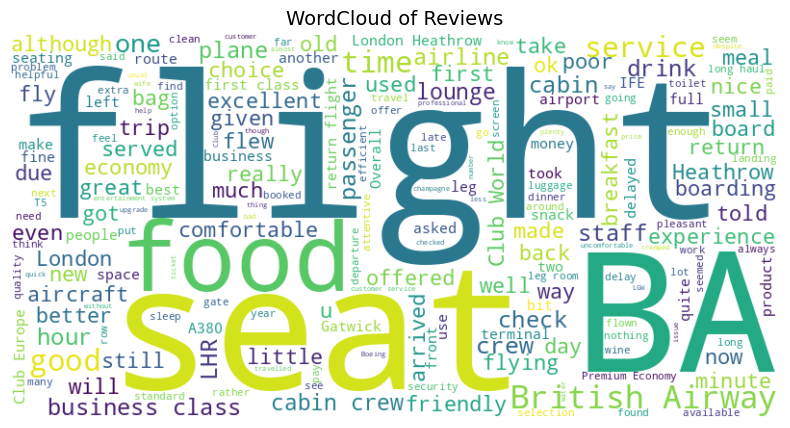

In [82]:
# Copy the filtered dataset to avoid modifying the original DataFrame
sorted_filtered_data_filtered_df = sorted_filtered_data.copy()

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply Sentiment Analysis on the 'review' column
sorted_filtered_data_filtered_df['Sentiment_Score'] = sorted_filtered_data_filtered_df['review'].astype(str).apply(
    lambda x: sia.polarity_scores(x)['compound']
)

# Ensure 'review' column is properly referenced
all_reviews = ' '.join(sorted_filtered_data_filtered_df['review'].dropna().astype(str))

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Reviews", fontsize=14)
plt.show();

In [84]:
import plotly.express as px

# Ensure the 'Sentiment_Score' column exists and is not empty
if not sorted_filtered_data_filtered_df['Sentiment_Score'].empty:
    # Analyze overall sentiment
    average_sentiment = sorted_filtered_data_filtered_df['Sentiment_Score'].mean()
    print(f'Average Sentiment: {average_sentiment:.2f}')

    # Categorize sentiment
    sorted_filtered_data_filtered_df['Sentiment_Label'] = sorted_filtered_data_filtered_df['Sentiment_Score'].apply(
        lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative'
    )

    # Get sentiment label distribution
    sentiment_label_counts = sorted_filtered_data_filtered_df['Sentiment_Label'].value_counts().reset_index()
    sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

    # Create a bar chart using Plotly
    fig = px.bar(
        sentiment_label_counts,
        x='Sentiment_Label',
        y='Count',
        color='Sentiment_Label',
        labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Count'},
        color_discrete_map={'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'},
        title='Sentiment Labels Distribution for neither verified nor unverified trips'
    )

    # Add text annotations to each bar
    for i, row in sentiment_label_counts.iterrows():
        fig.add_annotation(
            x=row['Sentiment_Label'],
            y=row['Count'] + max(5, 0.05 * row['Count']),  # Adjust text position dynamically
            text=str(row['Count']),
            showarrow=False,
            font=dict(color='black', size=12)
        )

    # Update layout for better visibility
    fig.update_layout(xaxis_title='Sentiment Label', yaxis_title='Number of Reviews')

    # Show the plot
    fig.show()

else:
    print("No sentiment scores available to analyze.")

Average Sentiment: 0.32


In [86]:
# Ensure the 'Sentiment_Label' column exists and is not empty
if 'Sentiment_Label' in sorted_filtered_data_filtered_df.columns and not sorted_filtered_data_filtered_df['Sentiment_Label'].empty:
    # Get sentiment label distribution
    sentiment_label_counts = sorted_filtered_data_filtered_df['Sentiment_Label'].value_counts().reset_index()
    sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

    # Create a Pie Chart using Plotly
    fig = px.pie(
        sentiment_label_counts,
        values='Count',
        names='Sentiment_Label',
        title='Sentiment Labels Distribution for neither verified nor unverified trips',
        color='Sentiment_Label',
        color_discrete_map={'Positive': 'blue', 'Neutral': 'yellow', 'Negative': 'red'},
        labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
        hole=0.2  # Set the size of the center hole in the pie chart
    )

    # Show the pie chart
    fig.show()

else:
    print("No sentiment labels available to visualize.")
